# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** Putri Pratiwi
- **Email:** putripratiwi790@gmail.com
- **ID Dicoding:** ppratiwi

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Apa pengaruh kondisi cuaca (weathersit) terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 = Bagaimana perubahan musim (season) mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 3 = Bagaimana tren penggunaan sepeda selama dua tahun (2011 dan 2012)?
- Pertanyaan 4 = Apakah terdapat perbedaan dalam jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?
- Pertanyaan 5 = Seberapa besar pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# menampilkan data day.csv
days_df = pd.read_csv("data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# menampilkan data hour.csv
hours_df= pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df and hour_df.
days_df.info()
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
# mengecek missing value dalam tabel days_df
days_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# mengecek duplikat data dalam tabel days_df
print("Jumlah duplikat data days_df: ", days_df.duplicated().sum())

Jumlah duplikat data days_df:  0


In [7]:
# mengecek missing value dalam tabel hours_df
hours_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# mengecek duplikat data dalam tabel hours_df
print("Jumlah duplikat data hours_df: ", hours_df.duplicated().sum())

Jumlah duplikat data hours_df:  0


(✓) Dapat dilihat dari hasil diatas bahwa **tidak ada** missing value dan duplikasi data pada data *days_df* dan *hours_df*.

In [9]:
# memeriksa parameter statistik data didalam days_df
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


★ **Ringkasan Statistik Deskriptif dataset Day**

- **Jumlah data(count):** 731 rekaman data.
- **Musim:** Rata-rata berada di sekitar musim panas (season 2).
- **Tahun:** Paling sering muncul di tahun 2012 (yr = 1).
- **Bulan:** Rata-rata bulan adalah sekitar 6.52 berarti berada di bulan Juli (mnth 7).
- **Hari Libur:** Rata-rata menunjukkan sekitar 2.87% hari adalah hari libur.
- **Hari dalam Seminggu:** Rata-rata hari adalah sekitar 2.997, mendekati pertengahan minggu.
- **Hari Kerja:** Rata-rata menunjukkan sekitar 68.40% hari adalah hari kerja.
- **Situasi Cuaca:** Rata-rata cuaca adalah sekitar 1.395, menunjukkan mayoritas cuaca adalah cerah hingga berawan.
- **Suhu:** Rata-rata suhu adalah sekitar 0.495.
- **Suhu Terasa:** Rata-rata suhu terasa adalah sekitar 0.474.
- **Kelembapan:** Rata-rata kelembapan adalah sekitar 0.628.
- **Kecepatan Angin:** Rata-rata kecepatan angin adalah sekitar 0.19.
- **Pengguna Kasual:** Rata-rata pengguna kasual adalah sekitar 848.
- **Pengguna Terdaftar:** Rata-rata pengguna terdaftar adalah sekitar 3656.
- **Jumlah Total Penyewaan:** Rata-rata jumlah penyewaan sepeda adalah sekitar 4504 /hari.

In [10]:
# memeriksa parameter statistik data didalam hours_df
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


★ **Ringkasan Statistik Deskriptif dataset Hour**

- **Jumlah data(count):** 17379 rekaman data.
- **Musim:** Rata-rata berada di sekitar musim panas (season 2).
- **Tahun:** Paling sering muncul di tahun 2012 (yr = 1).
- **Bulan:** Rata-rata bulan adalah sekitar 6.54 berarti berada di bulan Juli (mnth 7).
- **Jam:** Rata-rata jam adalah sekitar 11.55, menunjukkan bahwa data terkumpul sepanjang hari.
- **Hari Libur:** Rata-rata menunjukkan sekitar 2.88% hari adalah hari libur.
- **Hari dalam Seminggu:** Rata-rata hari adalah sekitar 3.00, mendekati pertengahan minggu.
- **Hari Kerja:** Rata-rata menunjukkan sekitar 68.3% jam adalah pada hari kerja.
- **Situasi Cuaca:** Rata-rata cuaca adalah sekitar 1.43, menunjukkan mayoritas cuaca adalah cerah hingga berawan.
- **Suhu:** Rata-rata suhu adalah sekitar 0.497 (setelah dikonversi menjadi sekitar 20.37°C).
- **Suhu Terasa:** Rata-rata suhu terasa adalah sekitar 0.476 (setelah dikonversi menjadi sekitar 23.79°C).
- **Kelembapan:** Rata-rata kelembapan adalah sekitar 0.627 (setelah dikonversi menjadi sekitar 62.72%).
- **Kecepatan Angin:** Rata-rata kecepatan angin adalah sekitar 0.19.
- **Pengguna Kasual:** Rata-rata pengguna kasual adalah sekitar 35.68.
- **Pengguna Terdaftar:** Rata-rata pengguna terdaftar adalah sekitar 153.79.
- **Jumlah Total Penyewaan:** Rata-rata jumlah penyewaan sepeda adalah sekitar 189.46.

### Cleaning Data

**&#9670; Mengubah tipe data kolom 'dteday' yang berupa _object_ menjadi tipe data 'datetime'**

In [11]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

**&#9670; Menghapus kolom yang tidak diperlukan untuk analisis**

In [12]:
# menghapus kolom 'instant' karena tidak memberikan informasi tambahan

days_df = days_df.drop(['instant'], axis=1)
hours_df = hours_df.drop(['instant'], axis=1)

**&#9670; Mengonversi Kolom Menjadi Tipe Data 'category' Jika Nilai Valid**

In [13]:
# Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    days_df[column] = days_df[column].astype("category")
    hours_df[column] = hours_df[column].astype("category")

**&#9670; Mengganti nilai kategori agar lebih mudah dibaca**

In [14]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
days_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count','hum':'humidity'},inplace=True)

In [15]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hours_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count','hum':'humidity'},inplace=True)

In [16]:
# Mengubah nilai kategori menjadi label
days_df['season'] = days_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hours_df['season'] = hours_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

days_df['weather_situation'] = days_df['weather_situation'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})
hours_df['weather_situation'] = hours_df['weather_situation'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

days_df['one_of_week'] = days_df['one_of_week'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hours_df['one_of_week'] = hours_df['one_of_week'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

days_df['month'] = days_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hours_df['month'] = hours_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

days_df['year'] = days_df['year'].map({0: '2011', 1: '2012'})
hours_df['year'] = hours_df['year'].map({0: '2011', 1: '2012'})

**&#9670; Memisahkan kategori weekday dan weekend**

In [17]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hours_df["category_days"] = hours_df["one_of_week"].apply(get_category_days)
days_df["category_days"] = days_df["one_of_week"].apply(get_category_days)

**&#9670; Mengonversi nilai yang ternormalisasi kembali ke nilai aslinya untuk interpretasi yang lebih baik**

In [18]:
# Menghitung Humidity
days_df['humidity'] = days_df['humidity']*100
hours_df['humidity'] = hours_df['humidity']*100

# Mengonversi suhu dari nilai ternormalisasi menjadi derajat Celsius
days_df['temp'] = days_df['temp'] * 41
days_df['atemp'] = days_df['atemp'] * 50
hours_df['temp'] = hours_df['temp'] * 41
hours_df['atemp'] = hours_df['atemp'] * 50

# Mengonversi kecepatan angin dari nilai ternormalisasi menjadi kecepatan aslinya
days_df['wind_speed'] = days_df['wind_speed'] * 67
hours_df['wind_speed'] = hours_df['wind_speed'] * 67

**&#9670; Memastikan konsistensi data**

In [19]:
# Memeriksa nilai yang berada di luar rentang yang diharapkan
print("Nilai unik dalam kolom 'season' pada days_df:", days_df['season'].unique())
print("Nilai unik dalam kolom 'season' pada hours_df:", hours_df['season'].unique())

print("Nilai unik dalam kolom 'weather_situation' pada days_df:", days_df['weather_situation'].unique())
print("Nilai unik dalam kolom 'weather_situation' pada hours_df:", hours_df['weather_situation'].unique())

# Verifikasi bahwa nilai telah diganti dengan benar
print(days_df[['season', 'weather_situation', 'one_of_week', 'month']].head())
print(hours_df[['season', 'weather_situation', 'one_of_week', 'month']].head())

Nilai unik dalam kolom 'season' pada days_df: ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
Nilai unik dalam kolom 'season' pada hours_df: ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
Nilai unik dalam kolom 'weather_situation' pada days_df: ['Mist', 'Clear', 'Light Snow/Rain']
Categories (3, object): ['Clear', 'Mist', 'Light Snow/Rain']
Nilai unik dalam kolom 'weather_situation' pada hours_df: ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow']
Categories (4, object): ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow']
   season weather_situation one_of_week month
0  Spring              Mist    Saturday   Jan
1  Spring              Mist      Sunday   Jan
2  Spring             Clear      Monday   Jan
3  Spring             Clear     Tuesday   Jan
4  Spring             Clear   Wednesday   Jan
   season weather_situation one_of_week month
0  Spring             Clear    S

In [20]:
# Mengecek distribusi nilai dalam kolom 'weather_situation' di kedua DataFrame
print("Distribusi nilai 'weather_situation' dalam days_df:")
print(days_df['weather_situation'].value_counts())

print("\nDistribusi nilai 'weather_situation' dalam hours_df:")
print(hours_df['weather_situation'].value_counts())

Distribusi nilai 'weather_situation' dalam days_df:
Clear              463
Mist               247
Light Snow/Rain     21
Name: weather_situation, dtype: int64

Distribusi nilai 'weather_situation' dalam hours_df:
Clear              11413
Mist                4544
Light Snow/Rain     1419
Heavy Rain/Snow        3
Name: weather_situation, dtype: int64


**&#9670; Menyimpan Dataframe baru**

In [21]:
# Menyimpan data yang sudah dibersihkan ke file baru
days_df.to_csv('Dashboard/cleaned_day.csv', index=False)
hours_df.to_csv('Dashboard/cleaned_hour.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore Data Day

In [22]:
# melihat rangkuman parameter statistik dari data day_df 
days_df.describe(include="all")

C:\Users\MBN0C\AppData\Local\Temp\ipykernel_4140\445162659.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  days_df.describe(include="all")


,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days
count,731,731,731,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,731,4,2,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,1,188,366,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.465233,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000,NaN


**◆ Jumlah Penyewaan Berdasarkan Musim**

In [23]:
# Melihat jumlah penyewaan tiap musim

season_grouped = days_df.groupby(by="season").agg({
    "count":["sum"]
}).reset_index()

season_grouped.columns = ['season', 'count_sum']

print(season_grouped.sort_values(by='count_sum', ascending=False))

   season  count_sum
2    Fall    1061129
1  Summer     918589
3  Winter     841613
0  Spring     471348


**◆ Jumlah Penyewaan Berdasarkan Tahun dan Jenis Pengguna**

In [24]:
# Melihat jumlah penyewaan tiap tahun berdasarkan registered dan casual

days_df.groupby(by="dteday").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

days_df.groupby(by="dteday").agg({
    "count":["sum"]
})

,count
,sum
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


**◆ Distribusi Penyewaan Sepeda Berdasarkan Hari dalam Seminggu**

In [25]:
# Melihat distribusi penyewaan sepeda berdasarkan hari dalam seminggu

day_of_week_grouped = days_df.groupby(by="one_of_week").agg({
    "count": ["sum"]
}).reset_index()

day_of_week_grouped.columns = ['one_of_week', 'count_sum']

# Menampilkan hasil
print(day_of_week_grouped.sort_values(by='count_sum', ascending=False))

  one_of_week  count_sum
5      Friday     487790
4    Thursday     485395
6    Saturday     477807
3   Wednesday     473048
2     Tuesday     469109
1      Monday     455503
0      Sunday     444027


**◆ Distribusi penyewaan sepeda di hari kerja dan hari libur**

In [26]:
days_grouped = days_df.groupby('category_days').agg({
    "count" : ["sum"]
}).reset_index()

days_grouped.columns = ['category_days', 'count_sum']

# Menampilkan hasil
print(days_grouped.sort_values(by='count_sum', ascending=False))

  category_days  count_sum
0      weekdays    2370845
1       weekend     921834


**◆ Melihat total penyewaan sepeda**

In [27]:
days_df.groupby('dteday').agg({
    'count':['sum']
})

,count
,sum
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


### Explore Data Hour

In [28]:
# Melihat rangkuman parameter statistik dari data hours_df
hours_df.describe(include = "all")

C:\Users\MBN0C\AppData\Local\Temp\ipykernel_4140\1070114642.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hours_df.describe(include = "all")


,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,731,4,2,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,24,4496,8734,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,NaN
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,0.465431,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,NaN


**◆ Distribusi penyewaan sepeda berdasarkan cuaca**

In [29]:
weather_grouped = hours_df.groupby('weather_situation').agg({
    "count":["sum"]
}).reset_index()

weather_grouped.columns = ['weather_situation', 'count_sum']

print(weather_grouped.sort_values(by='count_sum', ascending=False))

  weather_situation  count_sum
0             Clear    2338173
1              Mist     795952
2   Light Snow/Rain     158331
3   Heavy Rain/Snow        223


**◆ Distribusi penyewaan sepeda berdasarkan jam**

In [30]:
# Melihat distribusi penyewaan berdasarkan jam yang paling sering disewa(dataset hour_df)

hourly_counts = hours_df.groupby('hours')['count'].sum().reset_index()
hourly_counts.columns = ['hours', 'count_sum']

hourly_counts = hourly_counts.sort_values(by='count_sum', ascending=False)

print(hourly_counts.to_string(index=False))

# Melihat distribusi penyewaan ascending berdasarkan jam dimulai dari 0-23
# hours_df.groupby(by="hours").agg({
#     "count": ["sum"]
# })

 hours  count_sum
    17     336860
    18     309772
     8     261001
    16     227748
    19     226789
    13     184919
    12     184414
    15     183149
    14     175652
    20     164550
     9     159438
     7     154171
    11     151320
    10     126257
    21     125445
    22      95612
    23      63941
     6      55132
     0      39130
     1      24164
     2      16352
     5      14261
     3       8174
     4       4428


## Visualization & Explanatory Analysis

- Pertanyaan 1 = Apa pengaruh kondisi cuaca (weathersit) terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 = Bagaimana perubahan musim (season) mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 3 = Bagaimana tren penggunaan sepeda selama dua tahun (2011 dan 2012)?
- Pertanyaan 4 = Apakah terdapat pengaruh Jumlah penyewaan sepeda tehadap pengguna kasual dan terdaftar(registered) berdasarkan hari kerja dan libur?

### Pertanyaan 1: Apakah ada pengaruh kondisi cuaca (weathersit) terhadap jumlah penyewaan sepeda?

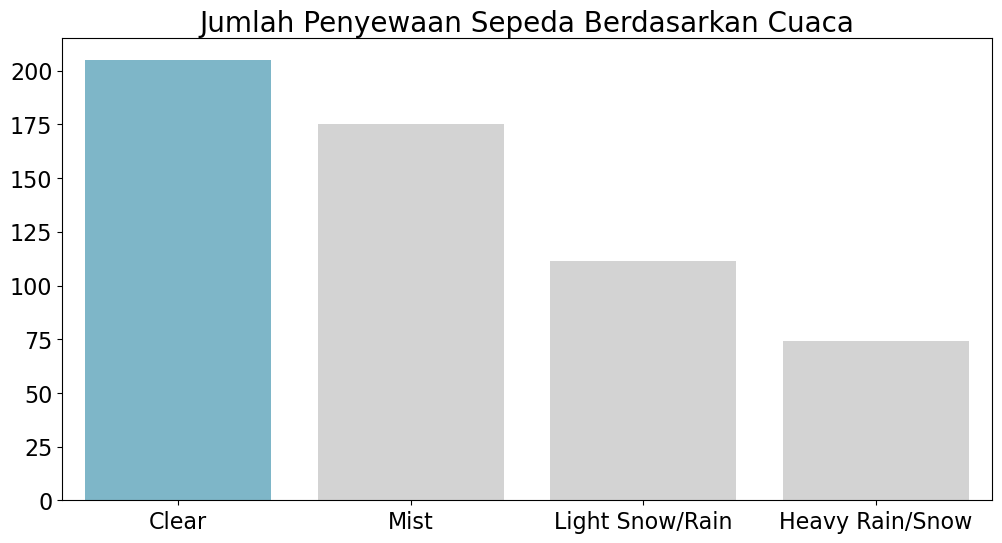

In [31]:
colors= [ "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata jumlah penyewaan sepeda
weather_counts = hours_df.groupby('weather_situation')['count'].mean().reset_index()

# Visualisasi pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda (Hour)
plt.figure(figsize=(12,6))
sns.barplot(data=weather_counts, x='weather_situation', y='count', palette=colors)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Cuaca', fontsize=20, pad=5)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

  Berdasarkan visualisasi data yang telah dibuat, didapatkan bahwa pada cuaca '**clear**' jumlah penyewaan sepeda lebih banyak dibandingkan dengan kondisi lainnya, hal ini menjadi dasar dapat dibuktikan bahwa cuaca mempengaruhi bagaimana jumlah penyewaan sepeda terjadi.

### Pertanyaan 2: Apakah perubahan musin (season) mempengaruhi jumlah penyewaan sepeda?

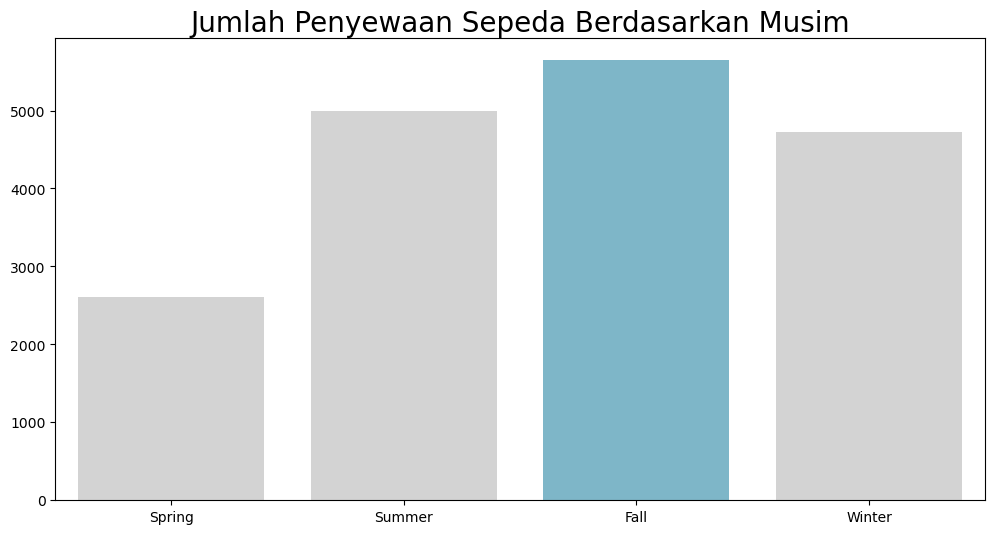

In [32]:
colors= [ "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

# Mengelompokka data berdasarkan musim dan menghitung rata-rata jumlah penyewaan sepeda
season_counts = days_df.groupby('season')['count'].mean().reset_index()

# Visualisasi pengaruh musim terhadap jumlah penyewaan sepeda
plt.figure(figsize=(12,6))
sns.barplot(data=season_counts, x='season', y='count', palette=colors)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize=20, pad=5)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Berdasarkan visualisasi yang telah dibuat, dapat dilihat bahwa **Musim Gugur** (Fall) dan **Musim Panas** (Summer) memiliki rata-rata jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan musim lainnya. Dari perbandingan rata-rata jumlah penyewaan sepeda disetipa musim, terlihat jelas bahwa ada pengaruh perubahan musim terhadap jumlah penyewaan sepeda. Musim yang lebih hangat cenderung memiliki lebih banyak penyewaan sepeda dibandingkan dengan musim yang lebih dingin.

### Pertanyaan 3: Bagaimana tren penyewaan sepeda per- bulan selama dua tahun (2011 - 2012)?


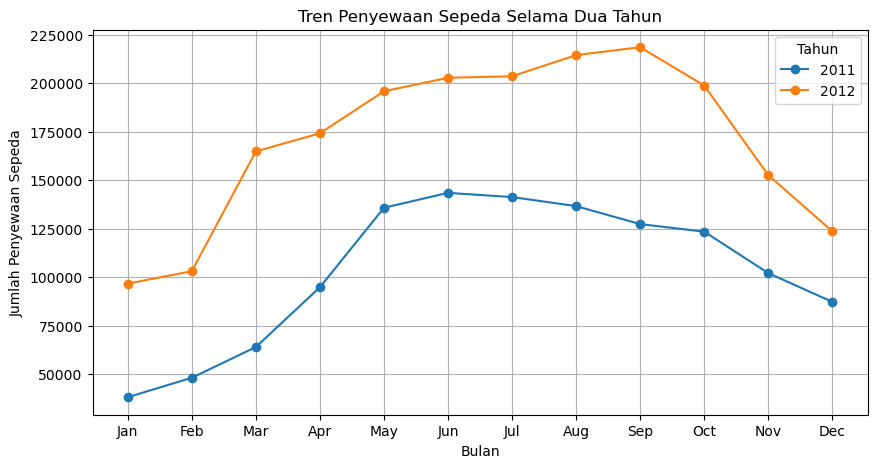

In [33]:
# Menghitung jumlah pelanggan maksimum per bulan
monthly_counts = days_df.groupby(['year', 'month']).agg({
    'count': 'sum'
}).reset_index()

# Mengubah index bulan ke nomor bulan yang tepat, menambahkan kolom baru *month_num*
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_counts['month_num'] = monthly_counts['month'].apply(lambda x: month_order.index(x) + 1)

# Mengurutkan data berdasarkan tahun dan bulan
monthly_counts = monthly_counts.sort_values(by=['year', 'month_num'])

# Melakukan plotting
plt.figure(figsize=(10, 5))
for year in monthly_counts['year'].unique():
    subset = monthly_counts[monthly_counts['year'] == year]
    plt.plot(subset['month'], subset['count'], marker='o', label=year)

plt.title('Tren Penyewaan Sepeda Selama Dua Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Tahun')
plt.grid(True)

# Menampilkan chart
plt.show()


Berdasarkan visualisasi diatas, dapat kita lihat bahwa penyewaan sepeda selama dua tahun menunjukkan pola musiman yang kuat, dengan peningkatan selama bulan-bulan di musim panas dan penurunan selama di musim dingin. Tahun 2012 menunjukkan peningkatan signifikan dalam jumlah penyewaan sepeda dibandingkan dengan tahun 2011. Hal ini menunjukkan tren yang positif dalam popularitas penyewaan sepeda.

### Pertanyaan 4: Apakah terdapat pengaruh Jumlah penyewaan sepeda tehadap pengguna kasual dan terdaftar(registered) berdasarkan hari kerja dan libur?

**Berdasarkan Pengguna Casual dan Registered:**

In [ ]:
colors = ["#D3D3D3", "#72BCD4"]
# Membuat boxplot untuk pengguna casual
plt.figure(figsize=(10, 6))
sns.barplot(data=days_df, x='category_days', y='casual', hue='year', palette=colors)
plt.title('Perbandingan Jumlah Penyewaan Sepeda oleh Pengguna Casual')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Tahun')
plt.show()

# Membuat boxplot untuk pengguna terdaftar
plt.figure(figsize=(10, 6))
sns.barplot(data=days_df, x='category_days', y='registered', hue='year', palette=colors)
plt.title('Perbandingan Jumlah Penyewaan Sepeda oleh Pengguna Terdaftar')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Tahun')
plt.show()


Berdasarkan visualisasi diatas, maka dapat dilihat bahwa pengguna casual biasanya melakukan penyewaan sepeda di hari weekend atau di hari libur kerja, sedangkan dengan pengguna terdaftar paling banyak melakukan penyewaan sepeda di hari kerja.

## Conclusion

- Pertanyaan 1 = Apa pengaruh kondisi cuaca (weathersit) terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 = Bagaimana perubahan musim (season) mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 3 = Bagaimana tren penggunaan sepeda selama dua tahun (2011 dan 2012)?
- Pertanyaan 4 = Apakah terdapat pengaruh Jumlah penyewaan sepeda tehadap pengguna kasual dan terdaftar(registered) berdasarkan hari kerja dan libur?

### Conclusion
- Pertanyaan 1: Berdasarkan visualisasi data yang telah dibuat, didapatkan bahwa pada cuaca 'clear' jumlah penyewaan sepeda lebih banyak dibandingkan dengan kondisi lainnya, hal ini menjadi dasar dapat dibuktikan bahwa cuaca mempengaruhi bagaimana jumlah penyewaan sepeda terjadi.

- Pertanyaan 2: Berdasarkan visualisasi yang telah dibuat, dapat dilihat bahwa **Musim Gugur** (Fall) dan **Musim Panas** (Summer) memiliki rata-rata jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan musim lainnya. Dari perbandingan rata-rata jumlah penyewaan sepeda disetipa musim, terlihat jelas bahwa ada pengaruh perubahan musim terhadap jumlah penyewaan sepeda. Musim yang lebih hangat cenderung memiliki lebih banyak penyewaan sepeda dibandingkan dengan musim yang lebih dingin.

- Pertanyaan 3: Berdasarkan visualisasi diatas, dapat kita lihat bahwa penyewaan sepeda selama dua tahun menunjukkan pola musiman yang kuat, dengan peningkatan selama bulan-bulan di musim panas dan penurunan selama di musim dingin. Tahun 2012 menunjukkan peningkatan signifikan dalam jumlah penyewaan sepeda dibandingkan dengan tahun 2011. Hal ini menunjukkan tren yang positif dalam popularitas penyewaan sepeda.

- Pertanyaan 4: Pengguna Registered lebih memilih hari kerja untuk melakukan penyewaan sepeda, sebaliknya dengan pengguna casual lebih memilih hari libur untuk melakukan penyewaan sepeda.